# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [56]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.
df = dataframe
normal_describe = df.normal.describe()
normal_describe

count    10000.000000
mean        19.991456
std          4.013850
min          4.310399
25%         17.309638
50%         19.989620
75%         22.684324
max         35.704951
Name: normal, dtype: float64

In [5]:
binomial_describe = df.binomial.describe()
binomial_describe

count    10000.000000
mean        20.097000
std          4.041191
min          6.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         36.000000
Name: binomial, dtype: float64

In [6]:
tuple((normal_describe - binomial_describe)[['25%', '50%', '75%']].round(3))

(0.31, -0.01, -0.316)

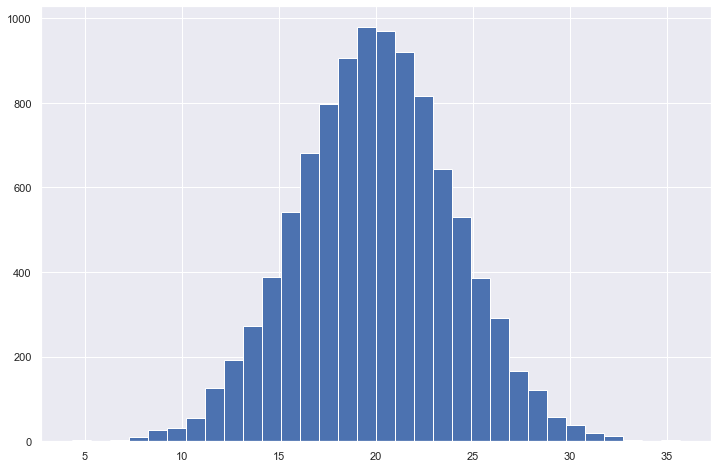

In [7]:
df.normal.hist(bins=int(df.normal.var()*2))

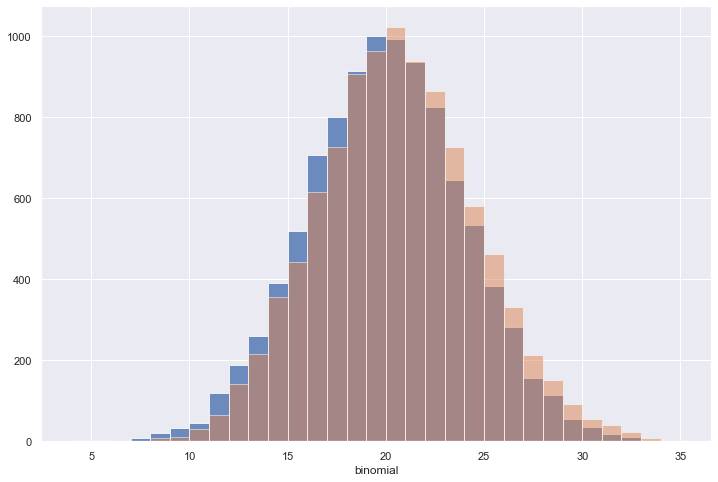

In [22]:
norm_min = round(df.normal.min())
norm_max = round(df.binomial.max())
binom_min = round(df.binomial.min())
binom_max = round(df.binomial.max())
#sns.distplot(df.normal, bins=range(norm_min, norm_max), kde=False, hist_kws={"alpha": 0.8});
#sns.distplot(df.binomial, bins=range(binom_min, binom_max), kde=False, hist_kws={"alpha": 0.5});

In [60]:
media = df.normal.mean()
desvio_p = df.normal.std()
prob_inf = sct.norm.cdf((media-desvio_p),media,desvio_p)
prob_sup = sct.norm.cdf((media+desvio_p),media,desvio_p)
prob_sup - prob_inf

0.6826894921370859

In [87]:
ecdf = ECDF(dataframe.normal)
media = dataframe.normal.mean()
desvio_p = dataframe.normal.std()
prob_inf = ecdf(media-desvio_p)
prob_sup = ecdf(media+desvio_p)
prob_sup - prob_inf

0.6838

In [70]:
df.normal.mean()

19.991456066526293

In [10]:
normal_m_v = pd.Series((df.normal.mean(), df.normal.var()))
binomial_m_v = pd.Series((df.binomial.mean(), df.binomial.var()))
tuple((binomial_m_v - normal_m_v).round(3))

(0.106, 0.22)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [89]:
def q1():
    # Retorne aqui o resultado da questão 1.
    binomial_qts = dataframe.binomial.quantile([0.25, 0.50, 0.75])
    normal_qts = dataframe.normal.quantile([0.25, 0.50, 0.75])
    
    return tuple((normal_qts - binomial_qts).round(3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [88]:
def q2():
    # Retorne aqui o resultado da questão 2.
    media = dataframe.normal.mean()
    desvio_p = dataframe.normal.std()
    ecdf = ECDF(dataframe.normal)

    prob_inf = ecdf(media-desvio_p)
    prob_sup = ecdf(media+desvio_p)

    return float(prob_sup - prob_inf)

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [13]:
def q3():
    # Retorne aqui o resultado da questão 3.
    normal_m_v = pd.Series((dataframe.normal.mean(), dataframe.normal.var()))
    binomial_m_v = pd.Series((dataframe.binomial.mean(), dataframe.binomial.var()))
    return tuple((binomial_m_v - normal_m_v).round(3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [14]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [23]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_profile  17897 non-null  float64
 1   sd_profile    17897 non-null  float64
 2   kurt_profile  17897 non-null  float64
 3   skew_profile  17897 non-null  float64
 4   mean_curve    17897 non-null  float64
 5   sd_curve      17897 non-null  float64
 6   kurt_curve    17897 non-null  float64
 7   skew_curve    17897 non-null  float64
 8   target        17897 non-null  bool   
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [24]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [46]:
aux = stars[stars['target']==False]['mean_profile']
false_pulsar_mean_profile_standardized = (aux - aux.mean())/aux.std()
prof_q1 = false_pulsar_mean_profile_standardized.quantile(.25)
prof_q2 = false_pulsar_mean_profile_standardized.quantile(.50)
prof_q3 = false_pulsar_mean_profile_standardized.quantile(.75)
prof_qs = pd.Series((prof_q1, prof_q2, prof_q3))
prof_qs

0   -0.647153
1    0.039859
2    0.670655
dtype: float64

In [91]:
aux = stars[stars['target']==False]['mean_profile']
false_pulsar_mean_profile_standardized = (aux - aux.mean())/aux.std()
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
           ...   
17892    1.136934
17893    0.342963
17894    0.158776
17895   -0.117504
17896   -3.404704
Name: mean_profile, Length: 16258, dtype: float64

In [92]:
quant_80 = sct.norm.ppf(0.80, loc=0, scale=1)
quant_90 = sct.norm.ppf(0.90, loc=0, scale=1)
quant_95 = sct.norm.ppf(0.95, loc=0, scale=1)
quant_80, quant_90, quant_95

(0.8416212335729143, 1.2815515655446004, 1.6448536269514722)

In [95]:
ecdf = ECDF(false_pulsar_mean_profile_standardized)
pdf_80 = round(ecdf(quant_80), 3)
pdf_90 = round(ecdf(quant_90), 3)
pdf_95 = round(ecdf(quant_95), 3)
pdf_80, pdf_90, pdf_95

(0.806, 0.911, 0.959)

In [47]:
dist_norm_q1 = sct.norm.ppf(0.25, loc=0, scale=1)
dist_norm_q2 = sct.norm.ppf(0.50, loc=0, scale=1)
dist_norm_q3 = sct.norm.ppf(0.75, loc=0, scale=1)
dist_nomr_qs = pd.Series((dist_norm_q1, dist_norm_q2, dist_norm_q3))
dist_nomr_qs

0   -0.67449
1    0.00000
2    0.67449
dtype: float64

In [52]:
tuple((prof_qs - dist_nomr_qs).round(3))

(0.027, 0.04, -0.004)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [96]:
def q4():
    # Retorne aqui o resultado da questão 4.
    aux = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (aux - aux.mean())/aux.std()

    quant_80 = sct.norm.ppf(0.80, loc=0, scale=1)
    quant_90 = sct.norm.ppf(0.90, loc=0, scale=1)
    quant_95 = sct.norm.ppf(0.95, loc=0, scale=1)

    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    pdf_80 = round(ecdf(quant_80), 3)
    pdf_90 = round(ecdf(quant_90), 3)
    pdf_95 = round(ecdf(quant_95), 3)
    
    return (pdf_80, pdf_90, pdf_95)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [55]:
def q5():
    # Retorne aqui o resultado da questão 5.
    aux = stars[stars['target']==False]['mean_profile']
    false_pulsar_mean_profile_standardized = (aux - aux.mean())/aux.std()

    prof_q1 = false_pulsar_mean_profile_standardized.quantile(.25)
    prof_q2 = false_pulsar_mean_profile_standardized.quantile(.50)
    prof_q3 = false_pulsar_mean_profile_standardized.quantile(.75)
    prof_qs = pd.Series((prof_q1, prof_q2, prof_q3))
    
    dist_norm_q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    dist_norm_q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    dist_norm_q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    dist_nomr_qs = pd.Series((dist_norm_q1, dist_norm_q2, dist_norm_q3))
    
    return tuple((prof_qs - dist_nomr_qs).round(3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.